# Lista 4 - Dipolo com método dos momentos


# Questão 1

Nosso objetivo é obter a distribuição de uma corrente numa antena de dipolo a partir de sua geometria. A partir do método dos momentos apresentado em sala para a corrente I precisamos resolver o sistema de equações:

$$\begin{bmatrix}
Z
\end{bmatrix}
\begin{bmatrix}
I
\end{bmatrix}
=
\begin{bmatrix}
V
\end{bmatrix}
$$


Através da expansão de funçoes de base triangulares e sucessivas aproximações é possível determinar uma formulação para esta equação. Aplicando o metodo dos momentos para obter Z, V das equações integrais e diferenciais do potencial vetor e campo elétrico das leis de maxwell em regime fasorial.

## solução por método dos momentos

Z é uma matriz de dimensões m x n dado por:

$$ Z_{mn} = k^2A_{mn} + Φ_{mn} $$


onde A e $\phi$ são:

$$ A_{mn} = \Delta^2\psi(m,n)$$



$$ \phi_{mn} = \psi(m-\frac{1}{2},n-\frac{1}{2})-
               \psi(m-\frac{1}{2},n+\frac{1}{2})-
               \psi(m+\frac{1}{2},n-\frac{1}{2})+
               \psi(m+\frac{1}{2},n+\frac{1}{2})
$$

por sua vez, $\psi$  foi calculado como:

$$
\psi(m,n) = \frac{1}{2\pi\Delta} ln(\frac{\Delta}{a}) - \frac{jk}{4\pi}
$$

se m=n, e

$$
\psi(m,n) = \frac{e^{-jk\sqrt{(z_m- z_n)^2 + a^2}}}{4\pi\sqrt{(z_m- z_n)^2 + a^2}}
$$

caso m $\neq$ n.

Os parâmetros e variáveis $\Delta, z_n$ descrevem a geometria e localização dos elementos discretos da antena definidos por:

$$z_n = -\frac{L}{2} + n\Delta$$


$$\Delta = \frac{L}{N+1}$$

L e N são parâmetros definidos.

Com isto podemos iniciar a implementação computacional em python.

# questão 2

Para implementação foi usado a linguagem python e suas bibliotecas cmath, numpy e matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [77]:
class Dipolo_mom():
  def __init__(self,L,N,a):
    self.L=L
    self.N=N
    self.a=a

    #constantes
    self.epsilon = 8.8541878128e-12
    self.light_speed = 299792458
    self.pi = 3.1415

    #parametros derivados
    self.lambda_ = L*2
    self.delta = (self.L/(self.N+1))
    self.k = 2*self.pi/self.lambda_
    self.omega = self.k*self.light_speed

    #resultados
    self.I = None
    self.V = None
    self.Z= None
    self.impedance = None

  def set(self,L,N,a):
    self.L=L
    self.N=N
    self.a=a

    #parametros derivados
    self.lambda_ = 2*L
    self.delta = (self.L/(self.N+1))
    self.k = 2*self.pi/self.lambda_
    self.omega = self.k*self.light_speed

    #resultados
    self.I = None
    self.V = None
    self.Z= None
    self.impedance = None

  def loc(self, n):
    return -self.L/2 + n*self.delta

  def psi(self,m,n):
    if m!=n:
      z_m = self.loc(m)
      z_n = self.loc(n)
      exp =  self.k*cmath.sqrt((z_m-z_n)**2 + self.a**2)*-1j
      div = 4*self.pi * cmath.sqrt((z_m - z_n)**2 + self.a**2)
      return (cmath.e**exp) / div
    else:
      return (1/(2*self.pi*self.delta))*cmath.log(self.delta/self.a) - self.k*1j / (4*self.pi)

  def phi(self, m,n):
    return self.psi(m-0.5, n-0.5) -self.psi(m+0.5, n-0.5) -self.psi(m-0.5, n+0.5) + self.psi(m+0.5, n+0.5)

  def A(self, m,n):
    return self.delta*self.delta*self.psi(m,n)

  def Z_func(self, m,n):
    return self.k*self.k*self.A(m,n) - self.phi(m,n)

  def Z_generate(self):
    self.Z = np.full([self.N,self.N], 0j)
    for i in range(self.N):
      for j in range(self.N):
        self.Z[i][j] = self.Z_func(i,j)
    return self.Z

  def V_generate(self):
    self.V = np.full([self.N, 1], 0j)
    val = self.omega*self.epsilon*-1j
    self.V[math.floor((self.N)/2)] = val
    return self.V

  def solve(self):
    self.Z = self.Z_generate()
    self.V = self.V_generate()
    self.I = np.linalg.solve(self.Z, self.V)
    z = np.linspace(-self.L/2, self.L/2 , self.N)

    #self.impedance = self.V[math.floor(self.N/2)] / self.I[math.floor(self.N/2)]
    self.impedance = 1 / self.I[math.floor(self.N/2)]

    return self.I,self.impedance, z


# questão 3

como especificado:

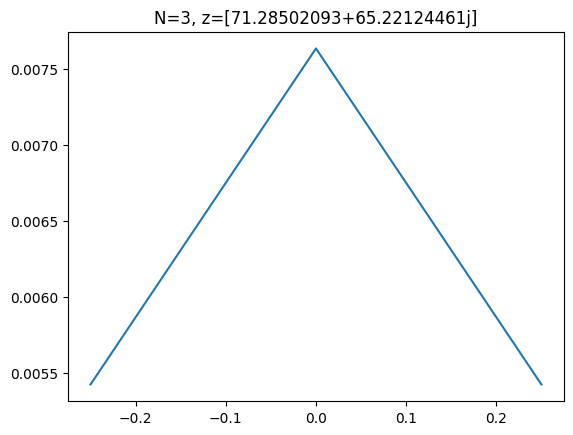

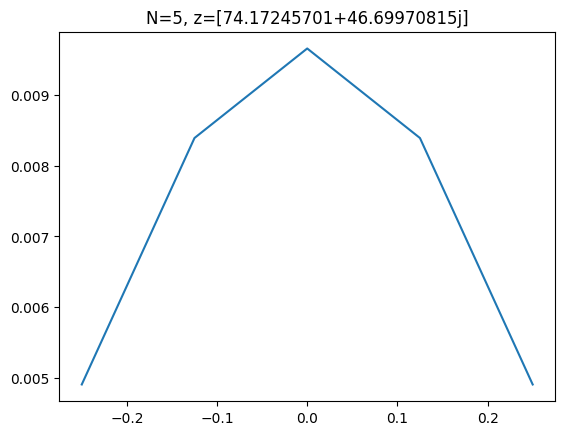

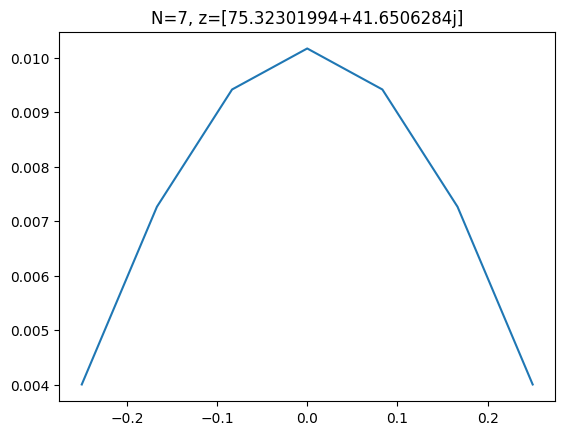

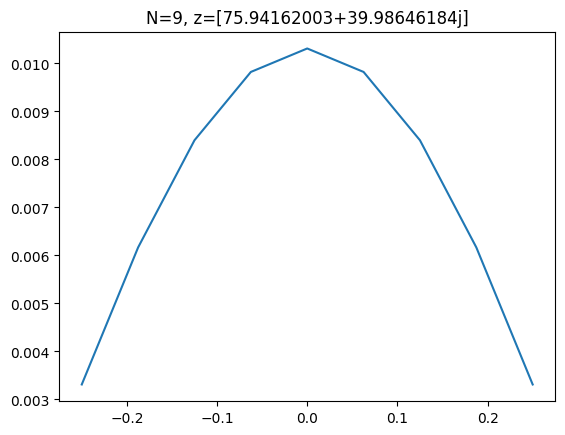

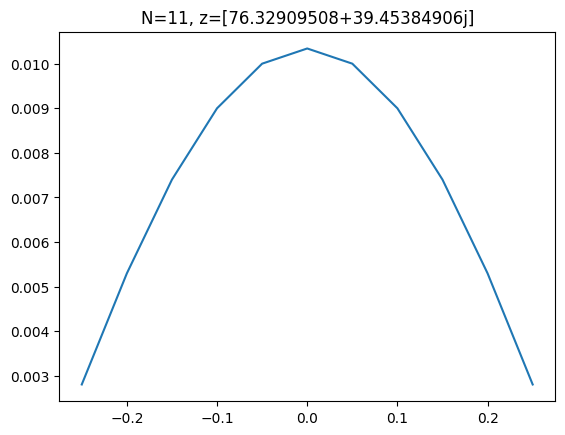

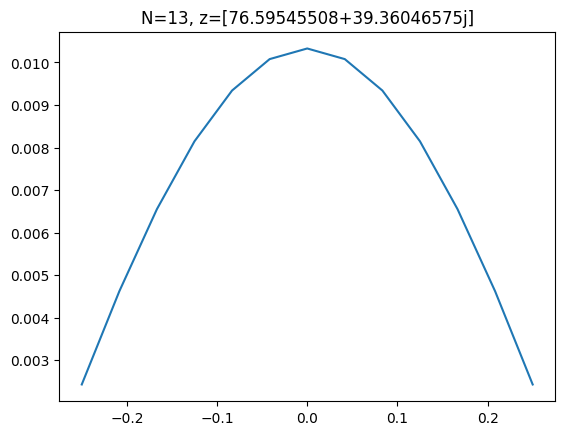

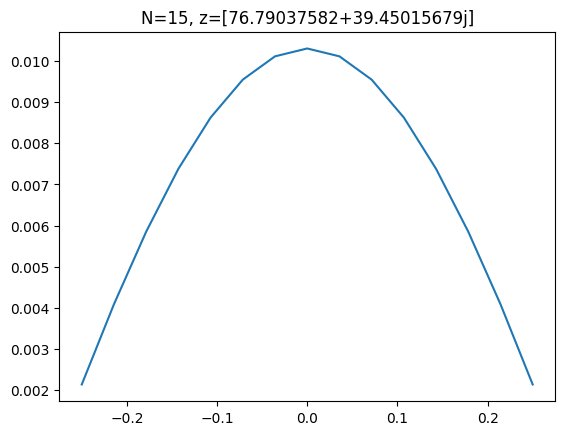

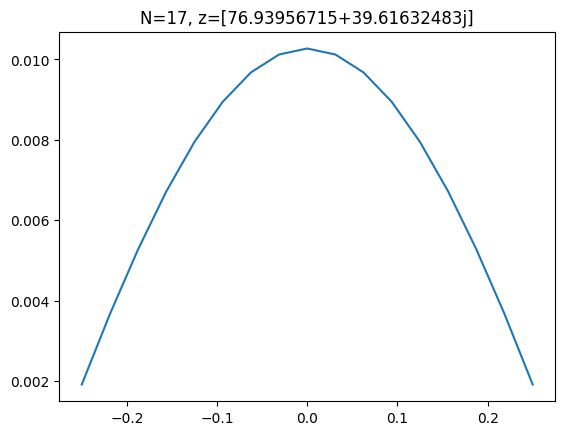

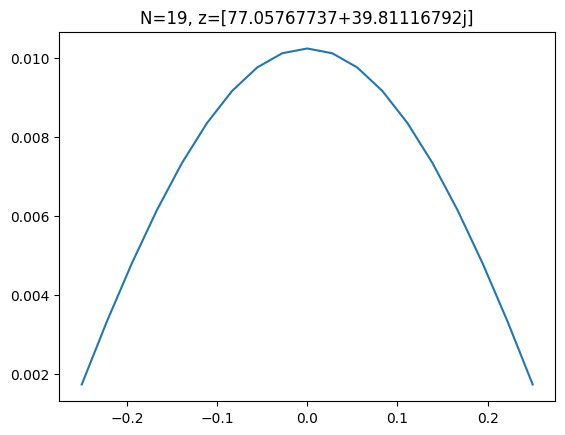

In [78]:
L =0.5
a = 1e-4

for i in range(0,9):
  N = 3 + 2*i
  dipolo = Dipolo_mom(L,N,a)
  y,impedance, x = dipolo.solve()
  plt.plot(x,y)
  plt.title("N={}, z={}".format(N,impedance))
  plt.show()


# questão 4

Para a antena anterior obtemos uma impedância de entrada de 77.05 + j 39.81, bastante próxima do calculado.

Observamos a convergência da impedância abaixo:

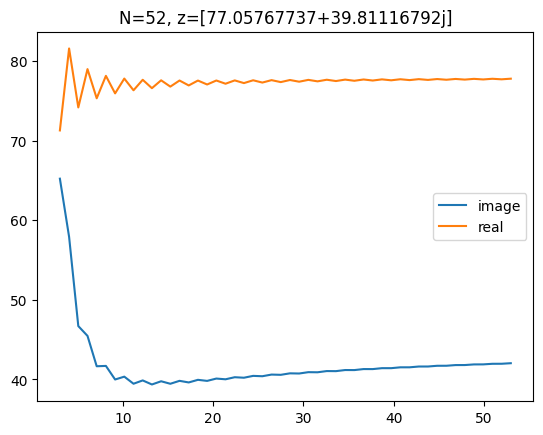

In [74]:
L =0.5
a = 1e-5
n=50

R=[]
X=[]
for i in range(0,n):
  N = 3 + i
  dipolo = Dipolo_mom(L,N,a)
  y,z, x = dipolo.solve()
  R.append(z.real)
  X.append(z.imag)

x = np.linspace(3,n+3,n)
plt.plot(x,X,label="image")
plt.plot(x,R,label="real")
plt.legend()
plt.title("N={}, z={}".format(N,impedance))
plt.show()